# Prediction Part

The prediction part is performing two task
1) Extracting aligned faces from the image provided. (This is based on the code provided at: https://www.pyimagesearch.com/2017/05/22/face-alignment-with-opencv-and-python/ )
2) Predicting the Ethnicity of the extracted face. ( For this we are using the model trained in ConvNet file as it gave the best accuracy)

In [1]:
import imutils
import dlib
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import keras
import numpy as np
from keras.models import load_model

Using TensorFlow backend.


In [3]:
# Load trained model by giving its path as parameter
model = load_model('keras_FACERACE_trained_model.h5')

C:\Users\DELL\Anaconda3\lib\site-packages\keras\utils\conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


In [4]:
from tkinter import filedialog
from tkinter import *
# Image choosed dialog box
root = Tk()
root.filename =  filedialog.askopenfilename(title = "Select file",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
print (root.filename)
root.withdraw()
detector = dlib.get_frontal_face_detector()
# Load predictor by giving its path as parameter
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=100,desiredLeftEye=(0.32, 0.32))

C:/Users/DELL/Downloads/face-alignment/images/example_17.jpg


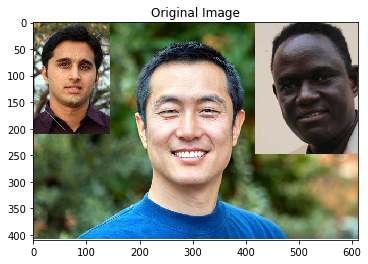

Detected Faces (which can be less than actual no. of faces) shown below with their expected Race: 


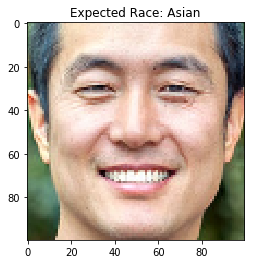

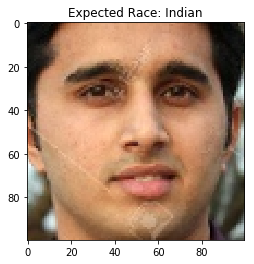

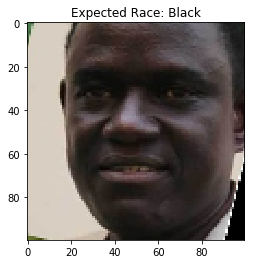

In [5]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(str(root.filename))
image = imutils.resize(image, width=800)
img=mpimg.imread(str(root.filename))
plt.imshow(img)
plt.title("Original Image")
# show the original input image and detect faces in the grayscale
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 2)
# Array denoting different races corresponding to the encoded label
array = ["White","Black","Asian","Indian","Other"]
# loop over the face detections
i = 0;
print("Detected Faces (which can be less than actual no. of faces) shown below with their expected Race: ")
for rect in rects:
    # extract the ROI of the *original* face, then align the face
    # using facial landmarks
    (x, y, w, h) = rect_to_bb(rect)
    faceAligned = fa.align(image, gray, rect)
    Xdata = []
    # Save all the faces in file
    cv2.imwrite("Img" + str(i) + ".png", faceAligned)
    faceAligned = cv2.cvtColor(faceAligned, cv2.COLOR_BGR2RGB)
    arr = np.reshape(faceAligned,(1,100,100,3))
    #Predicting the ethnicity using the trained model
    pd = model.predict(arr) 
    race = array[np.asscalar(pd.argmax(axis=1))]   # Extracting Ethinc name using the label
    # display the face with its expected race
    img=mpimg.imread("Img" + str(i) + ".png")
    plt.imshow(img)
    plt.title("Expected Race: "+race)
    plt.show()
    i = i + 1